In [6]:
# Aggreagated Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

# Datasets

In [7]:
# list of possible post areas 
post_areas = ['AB', 'DD', 'DG', 'EH', 'FK', 'G', 'HS', 'IV', 'KA', 'KW', 'KY', 'ML', 'PA', 'PH', 'TD']

# list of second letters in post codes 
sec_lets = ['B', 'D', 'G', 'H', 'K', 'S', 'V', 'A', 'W', 'Y', 'L']

In [8]:
## Candidate Warehouse Information 
# list of post codes for each candidate warehouse location (440 total)
candidate_loc_ids = ["AB10", "AB11", "AB12", "AB13", "AB14", "AB15", "AB16", "AB21", "AB22", "AB23", "AB24", "AB25",
       "AB30", "AB31", "AB32", "AB33", "AB34", "AB35", "AB36", "AB37", "AB38", "AB39", "AB41", "AB42", "AB43", "AB44",
       "AB45", "AB51", "AB52", "AB53", "AB54", "AB55", "AB56", "DD1", "DD2", "DD3", "DD4", "DD5", "DD6", "DD7",
       "DD8", "DD9", "DD10", "DD11", "DG1", "DG2", "DG3", "DG4", "DG5", "DG6", "DG7", "DG8", "DG9", "DG10", "DG11",
       "DG12", "DG13", "DG14", "EH1", "EH2", "EH3", "EH4", "EH5", "EH6", "EH7", "EH8", "EH9", "EH10", "EH11", "EH12",
       "EH13", "EH14", "EH15", "EH16", "EH17", "EH18", "EH19", "EH20", "EH21", "EH22", "EH23", "EH24", "EH25", "EH26",
       "EH27", "EH28", "EH29", "EH30", "EH31", "EH32", "EH33", "EH34", "EH35", "EH36", "EH37", "EH38", "EH39", "EH40",
       "EH41", "EH42", "EH43", "EH44", "EH45", "EH46", "EH47", "EH48", "EH49", "EH51", "EH52", "EH53", "EH54", "EH55", 
       "FK1", "FK2", "FK3", "FK4", "FK5", "FK6", "FK7", "FK8", "FK9", "FK10", "FK11", "FK12", "FK13", "FK14", "FK15", 
       "FK16", "FK17", "FK18", "FK19", "FK20", "FK21", "G1", "G2", "G3", "G4", "G5", "G11", "G12", "G13", "G14", "G15",
       "G20", "G21", "G22", "G23", "G31", "G32", "G33", "G34", "G40", "G41", "G42", "G43", "G44", "G45", "G46", "G51",
       "G52", "G53", "G60", "G61", "G62", "G63", "G64", "G65", "G66", "G67", "G68", "G69", "G71", "G72", "G73", "G74",
       "G75", "G76", "G77", "G78", "G81", "G82", "G83", "G84", "HS1", "HS2", "HS3", "HS4", "HS5", "HS6", "HS7", "HS8",
       "HS9", "IV1", "IV2", "IV3", "IV4", "IV5", "IV6", "IV7", "IV8", "IV9", "IV10", "IV11", "IV12", "IV13", "IV14",
       "IV15", "IV16", "IV17", "IV18", "IV19", "IV20", "IV21", "IV22", "IV23", "IV24", "IV25", "IV26", "IV27", "IV28",
       "IV30", "IV31", "IV32", "IV36", "IV40", "IV41", "IV42", "IV43", "IV44", "IV45", "IV46", "IV47", "IV48", "IV49",
       "IV51", "IV52", "IV53", "IV54", "IV55", "IV56", "IV63", "KA1", "KA2", "KA3", "KA4", "KA5", "KA6", "KA7", "KA8",
       "KA9", "KA10", "KA11", "KA12", "KA13", "KA14", "KA15", "KA16", "KA17", "KA18", "KA19", "KA20", "KA21", "KA22",
       "KA23", "KA24", "KA25", "KA26", "KA27", "KA28", "KA29", "KA30", "KW1", "KW2", "KW3", "KW5", "KW6", "KW7", "KW8",
       "KW9", "KW10", "KW11", "KW12", "KW13", "KW14", "KW15", "KW16", "KW17", "KY1", "KY2", "KY3", "KY4", "KY5", "KY6",
       "KY7", "KY8", "KY9", "KY10", "KY11", "KY12", "KY13", "KY14", "KY15", "KY16", "ML1", "ML2", "ML3", "ML4", "ML5",
       "ML6", "ML7", "ML8", "ML9", "ML10", "ML11", "ML12", "PA1", "PA2", "PA3", "PA4", "PA5", "PA6", "PA7", "PA8",
       "PA9", "PA10", "PA11", "PA12", "PA13", "PA14", "PA15", "PA16", "PA17", "PA18", "PA19", "PA20", "PA21", "PA22",
       "PA23", "PA24", "PA25", "PA26", "PA27", "PA28", "PA29", "PA30", "PA31", "PA32", "PA33", "PA34", "PA35", "PA36",
       "PA37", "PA38", "PA41", "PA42", "PA43", "PA44", "PA45", "PA46", "PA47", "PA48", "PA49", "PA60", "PA61", "PA62",
       "PA63", "PA64", "PA65", "PA66", "PA67", "PA68", "PA69", "PA70", "PA71", "PA72", "PA73", "PA74", "PA75", "PA76",
       "PA77", "PA78", "PA80", "PH1", "PH2", "PH3", "PH4", "PH5", "PH6", "PH7", "PH8", "PH9", "PH10", "PH11", "PH12",
       "PH13", "PH14", "PH15", "PH16", "PH17", "PH18", "PH19", "PH20", "PH21", "PH22", "PH23", "PH24", "PH25", "PH26",
       "PH30", "PH31", "PH32", "PH33", "PH34", "PH35", "PH36", "PH37", "PH38", "PH39", "PH40", "PH41", "PH42", "PH43", 
       "PH44", "PH49", "PH50", "TD1", "TD2", "TD3", "TD4", "TD5", "TD6", "TD7", "TD8", "TD9", "TD10", "TD11", "TD12",
       "TD13", "TD14", "TD15"]

# north/south coordinates of candidate warehouses
CandidateNorthing = [
    805109, 805438, 800946, 801808, 801140, 805243, 807657, 813514, 810671, 813701, 808107, 806862, 
    772929, 797856, 806889, 815718, 801026, 795471, 812134, 828039, 844502, 787598, 831277, 845456, 
    862838, 864362, 862558, 821933, 828365, 848707, 840805, 848264, 865694, 730303, 731337, 732816, 
    732560, 732292, 727307, 734762, 751562, 762105, 762084, 742427, 576807, 575299, 595111, 611178, 
    560277, 551009, 566178, 556588, 557969, 603588, 580567, 566902, 586884, 577111, 673712, 673961, 
    674110, 675105, 676544, 676108, 674816, 674023, 671722, 670314, 671790, 672805, 668883, 669259, 
    673112, 670496, 668821, 665534, 664912, 665674, 672273, 666477, 661180, 662394, 663420, 660615, 
    667255, 671486, 674669, 677858, 682927, 675305, 672487, 668843, 668986, 662448, 663675, 654218, 
    684305, 677637, 673105, 677732, 637159, 636644, 640751, 649941, 664040, 668583, 677112, 681005, 
    672702, 667610, 667577, 662649, 678503, 680557, 681050, 680022, 683025, 682637, 690791, 694751, 
    696396, 692961, 696827, 697038, 696791, 698447, 702803, 701791, 707508, 717162, 722726, 727384, 
    732818, 665159, 665541, 665952, 666123, 663987, 666909, 667628, 669222, 667760, 671157, 668202, 
    667520, 668715, 670044, 664875, 663841, 666608, 665856, 663962, 662800, 662272, 660695, 660171, 
    659109, 659097, 665056, 664137, 661175, 672778, 672037, 674661, 685697, 670894, 677545, 674088, 
    674377, 675056, 667100, 660731, 658639, 660710, 654945, 652982, 656174, 655886, 658172, 671535, 
    676067, 682484, 683362, 933259, 937362, 897985, 896603, 886387, 865207, 851708, 828659, 798485, 
    846191, 843901, 845124, 842189, 844516, 850778, 856852, 853678, 855314, 856895, 867240, 855322, 
    829671, 857793, 859069, 866217, 869925, 869647, 881278, 879722, 877492, 878633, 877698, 891436, 
    890270, 898176, 936077, 904157, 863289, 870397, 859821, 858787, 827491, 826413, 823232, 813737, 
    808330, 803122, 808816, 831189, 832194, 820896, 848330, 833222, 833638, 844113, 850794, 838182, 
    827484, 636347, 636734, 641903, 636479, 626756, 617531, 620246, 622910, 625770, 631604, 639185, 
    639478, 643510, 652745, 653676, 637359, 637568, 619746, 609327, 642114, 642186, 643246, 648218, 
    649509, 654401, 594985, 630542, 655020, 655128, 659668, 952730, 940398, 936022, 934042, 930023, 
    922741, 915429, 904213, 900069, 938665, 958753, 952932, 967568, 1010698, 1008759, 1018583, 693482, 
    692943, 686311, 692131, 695665, 701144, 701208, 700999, 702062, 704104, 684875, 687742, 702639, 
    713690, 712829, 716745, 657869, 655359, 655061, 660232, 664793, 665608, 660775, 650269, 649675, 
    644749, 642894, 631570, 663960, 662213, 664788, 667200, 662673, 666545, 671266, 670347, 660071, 
    662921, 665637, 658890, 669896, 673722, 675584, 675794, 667129, 669900, 676903, 664377, 672186, 
    680853, 677274, 699884, 707428, 711186, 700542, 621506, 661755, 685399, 689312, 705141, 722579, 
    728148, 730039, 739657, 736088, 748641, 648609, 645691, 659680, 664962, 665995, 671295, 652249, 
    657915, 664566, 672300, 694174, 725210, 727253, 733383, 737812, 723253, 721707, 735117, 728073, 
    727408, 739356, 743137, 743494, 745896, 754429, 724364, 744149, 757105, 748337, 726290, 722073, 
    713348, 709049, 716567, 721733, 721571, 742197, 752210, 746535, 749611, 742931, 739419, 729930, 
    748182, 759776, 758048, 765912, 784158, 798725, 801781, 813003, 822974, 819059, 820338, 827741, 
    769754, 781488, 809201, 774460, 783962, 802317, 767651, 771669, 778230, 786554, 792467, 796876, 
    786594, 799738, 805208, 758618, 762079, 636855, 648371, 645124, 638798, 632406, 632449, 627132, 
    620181, 612356, 646719, 654777, 640188, 670810, 663526, 650712]

# east/west coordinate of candidate warehouse locations
CandidateEasting = [
    392949, 394404, 393407, 385705, 383616, 390049, 390626, 388067, 392761, 395127, 393517, 393198,
    371295, 368583, 381041, 354926, 351095, 329911, 335113, 320029, 326474, 387134, 394040, 406781, 
    397495, 370725, 365669, 375804, 363355, 376242, 354830, 340831, 344483, 339910, 336577, 339111, 
    342445, 347205, 343309, 355772, 343110, 359638, 372746, 363292, 299133, 294522, 285859, 276612, 
    283666, 268127, 271927, 239503, 206496, 308481, 315370, 320042, 334299, 337497, 325688, 325167, 
    324794, 321358, 323859, 326720, 327732, 327185, 326006, 324424, 321777, 320396, 322383, 319785, 
    330877, 327885, 328653, 329698, 330948, 327698, 334668, 334020, 334468, 328965, 326732, 323384, 
    311513, 313433, 312421, 313025, 348557, 340707, 340992, 344992, 341096, 346231, 339892, 340294, 
    354422, 358829, 351798, 367348, 336399, 333088, 325160, 314871, 296281, 296138, 300295, 299982, 
    307378, 307771, 304843, 301339, 288189, 290732, 292751, 280936, 286580, 280715, 280718, 272227, 
    279334, 289200, 284994, 288189, 292014, 297490, 278921, 272148, 262664, 256147, 258159, 236259, 
    257095, 259359, 258617, 257492, 259406, 259056, 255376, 256187, 253203, 253015, 252157, 257276, 
    261207, 259320, 257247, 261839, 264576, 264574, 267894, 260866, 257017, 258693, 256603, 258710, 
    260174, 255479, 255099, 252943, 252736, 246530, 254371, 255165, 253019, 261457, 271712, 265496, 
    275995, 274091, 268477, 270100, 266607, 261801, 263637, 262153, 257579, 253883, 248914, 249667, 
    239493, 238575, 228317, 142712, 141476, 114738, 121519, 101850, 83661, 78977, 77995, 67682, 266533, 
    268802, 265429, 248016, 255285, 252754, 257564, 264310, 269826, 272839, 278464, 288703, 279100, 
    247716, 254692, 260647, 265365, 271829, 277358, 287297, 178504, 187352, 220878, 260653, 278920, 
    210848, 234653, 273232, 320786, 323202, 333786, 304008, 179788, 174862, 167917, 170101, 166452, 
    162841, 159135, 138693, 152580, 162107, 144704, 180246, 185593, 184309, 124262, 134489, 249138, 
    242745, 237777, 242880, 250051, 249444, 241596, 233759, 234989, 235454, 232995, 234575, 232233, 
    230209, 232297, 235143, 253460, 256536, 258101, 230961, 226921, 224849, 223363, 220455, 229480, 
    231353, 219088, 201440, 216489, 220959, 220581, 335282, 332003, 324753, 318553, 315411, 311792, 
    302049, 290386, 283150, 278151, 313159, 289664, 310267, 344925, 325934, 341963, 329381, 326499, 
    323390, 315248, 319967, 325655, 328339, 337240, 348456, 356867, 311925, 306870, 311241, 323702, 
    334702, 349565, 276366, 280025, 271249, 273398, 272929, 277291, 287389, 284315, 276541, 269901, 
    287680, 299215, 248709, 247480, 246820, 250119, 242845, 241256, 243794, 246893, 239775, 240323, 
    238437, 235452, 235487, 233741, 228489, 225154, 219511, 219331, 223653, 208651, 197447, 200772, 
    216873, 219190, 212188, 218336, 207925, 171697, 182441, 185040, 185683, 207096, 210348, 184807, 
    199634, 229706, 190873, 192903, 164810, 136280, 131284, 130476, 139090, 142811, 116860, 124924, 
    124544, 155970, 138934, 162183, 170693, 172859, 171293, 130348, 138139, 145370, 148376, 152664, 
    155174, 157166, 143151, 140025, 149270, 128549, 99493, 122422, 169478, 309043, 313592, 294365, 
    289691, 286918, 276621, 287239, 301676, 296739, 316105, 324207, 329372, 322108, 326860, 281348, 
    291268, 254455, 283888, 263662, 270407, 278289, 290077, 290688, 294049, 300649, 303333, 241194, 
    227722, 237702, 210437, 221024, 220449, 165552, 180568, 170323, 166216, 168405, 167474, 147855, 
    140206, 127035, 209367, 218573, 348847, 352474, 364832, 357726, 373493, 356270, 345279, 365722, 
    350552, 371669, 379765, 384850, 377046, 393270, 399049]



In [9]:
## Customers Information
CustomerPopulation = [
    21964, 21237, 25414, 2725, 4881, 35543, 29238, 22181, 16311, 11143, 36343, 18407, 7229, 15319, 
    12902, 5273, 5387, 2624, 515, 1534, 4660, 17645, 20837, 33730, 23998, 4009, 11130, 34643, 4758, 
    12613, 11367, 9307, 14825, 13698, 41802, 36725, 43845, 31984, 9345, 12301, 29036, 10979, 21937, 
    28916, 26655, 24342, 4814, 4632, 5245, 5188, 12227, 12948, 16349, 3947, 13272, 13145, 2958, 1375, 
    6471, 870, 24459, 53734, 19621, 39099, 34265, 24077, 23280, 33092, 39578, 38512, 14638, 39720, 
    20661, 29591, 18560, 2222, 13884, 6319, 25319, 29469, 7996, 1655, 2880, 17022, 2609, 2830, 3647, 
    9506, 2612, 19072, 14001, 2540, 2235, 383, 1632, 394, 8772, 2129, 11905, 10810, 830, 3369, 10587, 
    3212, 26689, 36177, 16827, 15102, 19753, 9730, 54836, 8930, 29190, 46975, 17378, 13480, 19208, 
    13331, 31299, 18344, 13802, 37166, 2863, 4831, 6013, 4173, 10600, 1934, 3666, 234, 535, 413, 936, 
    7399, 2589, 17747, 12894, 10966, 20951, 24150, 32899, 18585, 17037, 30811, 28812, 18054, 7131, 
    24386, 36137, 41203, 8417, 11009, 31210, 27978, 16615, 28336, 14862, 26478, 22236, 29688, 31327, 
    5527, 27556, 13612, 9218, 26392, 13339, 37930, 34879, 18379, 33453, 28527, 47530, 31207, 37242, 
    38141, 22261, 23838, 24092, 38968, 25466, 24279, 21871, 5303, 14355, 1324, 291, 280, 1619, 1330, 
    1897, 1264, 2476, 48573, 19625, 4326, 1260, 4518, 5669, 887, 1314, 2501, 906, 12771, 631, 2211, 
    5885, 1790, 6444, 6137, 4840, 3053, 1044, 1441, 835, 1422, 2478, 1938, 3753, 458, 34045, 7926, 4808, 
    15455, 2309, 350, 436, 240, 297, 279, 76, 530, 81, 1104, 5145, 385, 153, 1288, 1209, 268, 2486, 
    29117, 7188, 38216, 5320, 9902, 19256, 28013, 19117, 16167, 15750, 20926, 18604, 17156, 543, 7156, 
    3257, 4108, 21401, 7700, 9438, 12775, 11139, 5214, 6269, 7390, 10780, 4660, 1376, 1468, 11471, 
    11067, 74, 1043, 310, 356, 96, 819, 1765, 1661, 104, 1666, 91, 12802, 8355, 3791, 9132, 25212, 
    30604, 11093, 21227, 20192, 18819, 27949, 34495, 1876, 8806, 60570, 39117, 10652, 6834, 21673, 
    24837, 54089, 40577, 51585, 22975, 46783, 55160, 15601, 19227, 23329, 10576, 34810, 8285, 22138, 
    40596, 23647, 23262, 22625, 6662, 5276, 15521, 1753, 3846, 5816, 3414, 4411, 16548, 17586, 29054, 
    2197, 2628, 11541, 6498, 777, 287, 12620, 429, 58, 143, 694, 7364, 2150, 1454, 4791, 1305, 725, 
    10692, 1295, 45, 2854, 798, 163, 1115, 848, 275, 122, 183, 177, 326, 182, 196, 132, 29, 7, 82, 
    209, 145, 275, 11, 20, 62, 37, 417, 70, 27, 1409, 177, 653, 195, 306, 43884, 34760, 5726, 820, 
    943, 2461, 9124, 2155, 921, 11000, 3389, 1947, 4069, 1768, 3502, 4004, 167, 767, 95, 1534, 2199, 
    3677, 811, 657, 905, 3764, 11, 552, 768, 11934, 1075, 317, 1259, 159, 158, 384, 298, 991, 83, 22, 
    0, 1152, 906, 17608, 2637, 1009, 2324, 11207, 7906, 7410, 6138, 18449, 1111, 7405, 4215, 827, 6315, 
    18083
]

CustDemand = [
    (6440, 10478, 10681, 3058),
    (18512, 14972, 116075, 14600),
    (36700, 22866, 214693, 23418),
    (4922, 912, 27032, 1082),
    (5032, 2794, 33258, 4080),
    (53235, 17434, 312657, 26111),
    (10770, 11513, 44224, 5958),
    (10887, 8612, 53167, 5390),
    (21045, 12084, 141739, 12810),
    (9235, 9247, 51161, 12570),
    (47431, 39479, 483278, 31732),
    (22188, 11930, 63083, 14405),
    (10091, 5578, 62968, 5057),
    (15337, 11130, 95586, 8885),
    (24796, 14715, 222410, 21521),
    (9394, 2810, 34895, 5080),
    (3056, 3019, 16500, 3353),
    (1518, 1572, 8546, 1598),
    (502, 213, 1858, 123),
    (1046, 1673, 6842, 2870),
    (7538, 4870, 48948, 3133),
    (18876, 9755, 39342, 4647),
    (28635, 12699, 169553, 15260),
    (20697, 9319, 88454, 9908),
    (35404, 30723, 213599, 50804),
    (4341, 2994, 29430, 4063),
    (11130, 7326, 100687, 7619),
    (18844, 17658, 70580, 8292),
    (10052, 2941, 67095, 5106),
    (12804, 9404, 43232, 14454),
    (9171, 5364, 38431, 3996),
    (11780, 6328, 60275, 5730),
    (24230, 16490, 197973, 26000),
    (8729, 5408, 62490, 4436),
    (41676, 23758, 162940, 46128),
    (43954, 43911, 143073, 54453),
    (22609, 28884, 102049, 29979),
    (22279, 29668, 157912, 50786),
    (10400, 8333, 67674, 15277),
    (6768, 6289, 34658, 4295),
    (35513, 22381, 299130, 25824),
    (14798, 13850, 96003, 24239),
    (18730, 20678, 108975, 19797),
    (23343, 25449, 129908, 49314),
    (25152, 14107, 109999, 10893),
    (26727, 26177, 152697, 16586),
    (3056, 1853, 10835, 1331),
    (4623, 2427, 20367, 1459),
    (7827, 4819, 31741, 7978),
    (10486, 6177, 79292, 4857),    
    (15731, 8287, 69475, 6438),
    (19332, 12507, 140211, 11192),
    (28784, 18203, 244788, 32772),
    (5979, 2609, 30436, 1870),
    (29001, 12734, 288231, 11199),
    (13454, 12302, 89606, 7339),
    (3181, 1291, 14055, 1029),
    (1396, 437, 6968, 573),
    (13489, 6719, 138133, 11851),
    (374, 295, 816, 157),
    (19567, 9804, 37002, 5038),
    (32697, 20118, 117436, 18397),
    (14783, 8571, 73640, 7665),
    (28384, 14027, 67489, 7286),
    (10611, 12614, 41527, 9292),
    (19415, 12583, 56675, 6526),
    (37332, 21644, 247955, 29822),
    (26334, 28622, 87425, 38962),
    (64866, 61979, 739281, 91807),
    (34007, 38278, 243013, 56555),
    (13146, 7884, 43132, 8732),
    (44109, 45099, 189903, 58497),
    (19373, 15835, 139665, 12891),
    (44319, 27925, 301771, 59538),
    (42473, 26318, 319308, 37730),
    (1047, 1016, 5276, 726),
    (19923, 15917, 156573, 27648),
    (4083, 4765, 10942, 3941),
    (21029, 18959, 115096, 9332),
    (33623, 27557, 234676, 20020),
    (7351, 9962, 40112, 16568),
    (1966, 1386, 6097, 2128),
    (2773, 2907, 20540, 5065),
    (14193, 16639, 49017, 21511),
    (4159, 2132, 38693, 1796),
    (2953, 1025, 17946, 532),
    (4858, 1947, 18256, 1390),
    (6807, 4597, 38711, 5406),
    (2602, 3512, 10494, 5142),
    (18830, 21658, 145117, 42066),
    (16841, 14301, 150715, 14604),
    (2172, 1839, 14993, 2070),
    (3104, 1209, 14787, 1268),
    (525, 249, 3065, 135),
    (1057, 805, 3413, 873),
    (801, 327, 5790, 569),
    (13084, 5155, 100812, 5009),
    (2993, 1175, 18007, 1804),
    (9785, 5921, 39553, 4374),
    (8082, 7109, 18006, 5514),
    (1308, 801, 7082, 1007),
    (2765, 1363, 12161, 883),
    (11192, 3747, 59468, 2878),
    (3686, 926, 9306, 967),
    (23649, 25266, 94327, 43238),
    (20553, 12641, 28911, 7557),
    (20984, 8147, 114301, 8272),
    (12365, 10561, 39080, 7691),
    (8639, 9153, 30851, 9128),
    (19246, 5612, 181971, 6994),
    (53837, 35638, 261822, 29971),
    (13103, 6362, 51704, 5066),
    (23404, 7221, 53664, 5249),
    (25297, 9364, 84323, 6427),
    (11323, 10233, 52075, 6507),
    (6147, 5714, 12947, 3399),
    (30742, 13228, 280454, 25591),
    (6828, 4795, 27419, 1527),
    (38719, 29590, 222853, 41274),
    (14989, 11327, 83068, 11220),
    (14060, 12117, 67719, 15296),
    (26198, 17016, 49724, 12785),
    (2179, 838, 6078, 672),
    (4259, 3928, 17547, 2118),
    (4731, 2516, 37066, 2641),
    (3470, 2258, 31696, 1878),
    (11141, 4272, 98651, 3399),
    (2784, 2049, 16287, 3601),
    (3145, 1404, 9621, 666),
    (364, 193, 1397, 251),
    (549, 606, 2445, 917),
    (383, 156, 960, 102),
    (609, 495, 1768, 411),
    (11301, 7505, 41715, 9392),
    (2576, 3136, 9125, 2346),
    (12278, 9892, 35146, 5370),
    (24374, 6252, 193086, 9145),
    (7167, 12814, 55946, 14430),
    (20460, 10022, 138673, 9102),
    (11130, 19423, 35142, 19497),
    (39934, 16474, 261182, 18456),
    (38656, 15788, 331618, 13331),
    (21339, 8719, 120048, 12899),
    (54490, 27212, 548689, 28846),
    (41179, 17495, 177414, 27901),
    (8472, 9279, 44125, 9348),
    (7558, 8076, 31833, 11105),
    (19984, 14222, 75110, 18331),
    (35557, 39000, 154360, 37975),
    (21910, 16174, 45056, 8033),
    (6227, 4581, 54691, 8091),
    (7154, 3672, 15244, 1925),
    (39012, 38244, 226836, 73643),
    (36916, 30378, 174281, 35287),
    (17057, 17204, 137801, 20826),
    (49181, 23622, 381746, 32014),
    (28714, 10015, 195337, 15402),
    (16957, 15053, 78937, 6762),
    (31739, 30061, 266922, 36669),
    (15258, 22219, 54997, 21707),
    (16755, 9987, 73581, 9711),
    (6544, 4457, 23720, 2537),
    (16162, 10215, 55738, 5326),
    (10071, 3289, 40108, 1229),
    (14874, 3549, 48750, 4134),
    (23554, 15651, 43126, 12920),
    (23286, 13431, 160543, 12429),
    (43254, 23874, 103637, 25822),
    (13019, 15269, 25280, 7863),
    (21237, 18113, 166172, 16706),
    (28746, 18302, 119802, 6102),
    (43550, 13726, 343524, 24478),
    (43380, 36158, 156510, 20000),
    (26228, 22014, 173091, 38078),
    (48288, 23682, 195912, 25437),
    (34090, 11830, 76852, 12653),
    (30126, 18628, 220928, 29508),
    (26440, 20683, 284175, 24282),
    (34963, 15381, 212215, 15797),
    (62353, 22106, 400838, 40935),
    (19254, 18360, 133784, 10811),
    (36038, 28713, 316651, 57557),
    (17407, 10036, 184117, 8051),
    (2629, 2120, 19103, 1942),
    (4973, 4640, 13598, 3350),
    (2028, 1628, 20141, 1145),
    (312, 244, 2319, 295),
    (286, 161, 1423, 204),
    (1157, 1012, 5383, 2039),
    (2002, 543, 8958, 483),
    (2848, 881, 13620, 1044),
    (1018, 483, 4153, 268),
    (1691, 1300, 9501, 2212),
    (34763, 34753, 154481, 31331),
    (14432, 24617, 132184, 33499),
    (3762, 1720, 10484, 1216),
    (1268, 833, 4736, 799),
    (2810, 1412, 10806, 711),
    (12921, 4509, 145434, 6796),
    (1163, 514, 8240, 781),
     (1025, 638, 2672, 238),
    (920, 1022, 3983, 770),
    (1023, 387, 3841, 391),
    (6146, 5121, 13688, 3026),
    (380, 486, 1976, 277),
    (1317, 746, 7078, 758),
    (10073, 6075, 96537, 6984),
    (3080, 2119, 21528, 4588),
    (3785, 5124, 11126, 2710),
    (13182, 9025, 76801, 14499),
    (1743, 1090, 3624, 675),
    (2427, 2920, 11994, 4702),
    (1333, 487, 7137, 480),
    (1500, 530, 8241, 471),
    (1650, 493, 9353, 898),
    (937, 495, 2677, 340),
    (2487, 906, 13262, 1011),
    (3519, 2324, 28286, 4050),
    (6000, 4857, 55504, 3779),
    (282, 516, 1542, 392),
    (43443, 19782, 347064, 23367),
    (12874, 9972, 67671, 9952),
    (2153, 2790, 8729, 2316),
    (15139, 10614, 94480, 5033),
    (2946, 1674, 18288, 3669),
    (251, 80, 469, 67),
    (596, 243, 3051, 385),
    (110, 76, 411, 54),
    (201, 146, 1192, 152),
    (522, 130, 2946, 257),
    (77, 56, 578, 73),
    (674, 484, 3124, 626),
    (66, 43, 370, 20),
    (1296, 1073, 8124, 1760),
    (5631, 4297, 25947, 4462),
    (207, 145, 720, 164),
    (65, 47, 190, 19),
    (2293, 1866, 16903, 2043),
    (992, 952, 5019, 418),
    (268, 94, 555, 64),
    (1608, 1726, 8479, 872),
    (39742, 29930, 326453, 28898),
    (3568, 2715, 14723, 2316),
    (32124, 26919, 137246, 36834),
    (6332, 4859, 46019, 3203),
    (8235, 8713, 54952, 10247),
    (19416, 6731, 85533, 10740),
    (21081, 11618, 79681, 13308),
    (24251, 18961, 193327, 20091),
    (15218, 9137, 82358, 8229),
    (6788, 4565, 14508, 3438),
    (11282, 13613, 44540, 18227),
    (22571, 12683, 127467, 20377),
    (10301, 10208, 50844, 7770),
    (530, 584, 5514, 1033),
    (5151, 2504, 17764, 969),
    (2852, 1987, 15044, 1279),
    (3179, 1952, 13453, 1668),
    (10777, 4108, 19284, 1586),
    (10793, 4253, 60293, 3704),
    (11050, 6794, 43919, 2898),
    (5136, 9532, 12485, 10738),
    (7852, 5343, 34972, 3815),
    (4294, 1444, 10794, 1106),
    (4379, 3166, 12668, 2434),
    (12547, 9288, 134942, 16104),
    (16022, 9278, 57077, 8348),
    (5557, 3836, 18997, 5665),
    (1315, 887, 11657, 1256),
    (1308, 1053, 6108, 1304),
    (8509, 6771, 25812, 6667),
    (9570, 4189, 22150, 3861),
    (32, 46, 105, 18),
    (1643, 621, 15410, 1231),
    (206, 192, 1627, 224),
    (349, 282, 1203, 112),
    (115, 100, 587, 104),
    (871, 735, 2087, 596),
    (1964, 674, 12851, 421),
    (2583, 1559, 9337, 1248),
    (50, 73, 99, 36),
    (1284, 1087, 4717, 1804),
    (61, 103, 459, 124),
    (15741, 7007, 105232, 8420),
    (14380, 9481, 138393, 9601),
    (2512, 2508, 9512, 1659),
    (7369, 6231, 23343, 10545),
    (17632, 11163, 56462, 8654),
    (27006, 19211, 117731, 19445),
    (7507, 11488, 36475, 17549),
    (29392, 14061, 97685, 7988),
    (10655, 6626, 43013, 4624),
    (15045, 16177, 40414, 12236),
    (20900, 19083, 71297, 16075),
    (20825, 27470, 168748, 18160),
    (736, 1152, 3446, 801),
    (7752, 6833, 52115, 9723),
    (25013, 19387, 91959, 17329),
    (42723, 18371, 108958, 14892),
    (3193, 1971, 5810, 1251),
    (6828, 2520, 18911, 1405),
    (14217, 13957, 91227, 8780),
    (37921, 10034, 133969, 11259),
    (57909, 50594, 501279, 59251),
    (41399, 21128, 264886, 18760),
    (34477, 17067, 105688, 17035),
    (36033, 14990, 290465, 22870),
    (48577, 38266, 381820, 43393),
    (69964, 45981, 601282, 52273),
    (26311, 16723, 115984, 16928),
    (30625, 12312, 199643, 8983),
    (46617, 31233, 311417, 35633),
    (8364, 5661, 38145, 6986),
    (26757, 12914, 69102, 9840),
    (8153, 5763, 19279, 4894),
    (14082, 14692, 73108, 15758),
    (16255, 21340, 60966, 20317),
    (33189, 16421, 159746, 28586),
    (21544, 10993, 63599, 17384),
    (23776, 15430, 115685, 26288),
    (8112, 4999, 66600, 4139),
    (9010, 2125, 66932, 4008),
    (14093, 9186, 40985, 8148),
    (2608, 1173, 19893, 882),
    (3350, 2058, 16819, 1778),
    (4414, 3456, 20807, 1734),
    (3032, 1273, 7717, 790),
    (8585, 4357, 34896, 3609),
    (31804, 20586, 272080, 22335),
    (11674, 12842, 51079, 18328),
    (20890, 15982, 74875, 5037),
    (1632, 1216, 9613, 971),
    (2785, 990, 19830, 1219),
    (20558, 17053, 91973, 31915),
    (4656, 3200, 14082, 3533),
    (594, 411, 3972, 336),
    (309, 253, 865, 237),
    (9442, 9444, 26319, 5239),
    (252, 221, 645, 144),
    (80, 45, 273, 56),
    (80, 30, 150, 22),
    (198, 244, 483, 118),
    (5743, 5768, 31624, 3189),
    (2272, 2111, 8515, 3928),
    (2177, 1483, 18878, 2212),
    (3398, 2043, 17769, 1889),
    (1128, 424, 5186, 174),
    (632, 216, 2361, 91),
    (16209, 5720, 118053, 7606),
    (798, 704, 5313, 877),
    (22, 20, 89, 13),
    (2767, 1953, 12934, 1385),
    (1302, 965, 5579, 878),
    (126, 179, 1055, 137),
    (1054, 331, 3316, 314),
    (983, 794, 7947, 1286),
    (499, 358, 3532, 282),
    (198, 133, 1792, 146),
    (119, 117, 296, 130),
    (234, 114, 1463, 73),
    (163, 150, 624, 152),
    (98, 182, 638, 255),
    (325, 232, 1880, 184),
    (203, 195, 1076, 377),
    (11, 15, 33, 10),
    (4, 3, 21, 2),
    (49, 60, 268, 61),
    (329, 150, 1222, 94),
    (248, 150, 1420, 299),
    (378, 181, 2417, 144),
    (22, 11, 128, 22),
    (20, 21, 65, 13),
    (82, 45, 658, 85),
    (47, 38, 194, 48),
    (551, 285, 3855, 238),
    (71, 31, 283, 30),
    (28, 21, 127, 32),
    (3211, 1579, 20859, 3593),
    (181, 54, 812, 52),
    (1002, 400, 3939, 468),
    (283, 130, 905, 172),
    (306, 172, 984, 221),
    (33489, 18193, 256389, 20120),
    (34274, 17873, 208180, 18444),
    (3819, 4568, 14408, 3335),
    (1558, 837, 13926, 785),
    (348, 230, 1320, 147),
    (2962, 3407, 16509, 5776),
    (6270, 4754, 14749, 1915),
    (2280, 1408, 12253, 1481),
    (603, 684, 2830, 465),
    (8799, 6454, 36735, 5254),
    (4358, 4081, 33145, 6129),
    (2669, 2129, 22535, 1562),
    (1322, 1197, 6018, 995),
    (1645, 904, 12110, 1898),
    (2816, 1707, 21191, 2366),
    (2963, 1540, 5398, 849),
    (119, 86, 598, 88),
    (1392, 464, 8111, 607),
    (93, 100, 574, 102),
    (739, 667, 2464, 369),
    (1447, 726, 6912, 501),
    (1234, 2085, 3011, 1913),
    (676, 470, 1102, 266),
    (664, 232, 3058, 236),
    (703, 490, 1827, 211),
    (2172, 3875, 17398, 2387),
    (15, 14, 79, 10),
    (333, 233, 1085, 173),
    (587, 930, 3012, 1013),
    (9965, 9815, 53280, 6258),
    (985, 592, 5718, 851),
    (272, 184, 893, 70),
    (2184, 1300, 14649, 2270),
    (110, 144, 457, 214),
    (174, 98, 842, 108),
    (307, 473, 2676, 335),
    (308, 152, 946, 59),
    (2134, 579, 12461, 450),
    (130, 88, 644, 156),
    (46, 23, 212, 34),
    (0, 0, 0, 0),
    (708, 377, 2399, 218),
    (1102, 395, 6085, 230),
    (22512, 8341, 97359, 5192),
    (3518, 1430, 19624, 1869),
    (1424, 344, 4143, 368),
    (2766, 750, 8517, 521),
    (8359, 4064, 17758, 2207),
    (5044, 7610, 28814, 8175),
    (4511, 3132, 11478, 1329),
    (3151, 1803, 5727, 1801),
    (20439, 14268, 114151, 14287),
    (438, 365, 1492, 136),
    (4414, 8121, 29770, 10677),
    (5584, 3149, 29095, 3830),
    (461, 442, 2167, 421),
    (7770, 3855, 30520, 4654),
    (15300, 27043, 161297, 59463)]

cust_dem = []
for i in range(len(CustDemand)):
    val = sum(CustDemand[i])
    cust_dem.append(val)

In [62]:
setup = [5424000,5312000,4388000,4318000,3716000,5228000,5326000,4108000,4920000
,4304000,5424000,5494000,986000,1770000,3940000,1210000,958000,625000,650000
,762000,1280000,2344000,1574000,720000,625000,986000,1028000,1938000,1084000
,1070000,1084000,1294000,1098000,4164000,4010000,4178000,4080000,3478000,3352000
,2414000,1938000,1056000,832000,1700000,1196000,1294000,678000,734000,692000
,625000,625000,625000,625000,650000,944000,790000,625000,650000,6166000,6166000
,6082000,5592000,5662000,5872000,5886000,5928000,5858000,5718000,5634000,5466000
,5312000,5074000,5354000,5662000,5494000,5494000,5382000,5494000,4612000,4920000
,4430000,5018000,5228000,4388000,4290000,4654000,4416000,4290000,2946000,3996000
,4528000,4304000,4626000,3618000,4416000,3016000,2400000,2960000,3646000,1896000
,2036000,2176000,2232000,2022000,3170000,3590000,3968000,3562000,4178000,4374000
,4262000,3660000,4010000,3996000,3898000,4304000,4052000,4052000,3856000,3268000
,4094000,3814000,4108000,3800000,3576000,3114000,3352000,3338000,2148000,1686000
,1602000,804000,1140000,6250000,6180000,6040000,6152000,6068000,5900000,6012000
,5746000,5662000,5396000,6040000,5816000,5844000,5550000,5956000,5522000,5508000
,5046000,5942000,5886000,6012000,5788000,5872000,5564000,5536000,5676000,5550000
,5410000,4780000,5578000,4976000,2358000,5242000,4066000,4402000,4192000,4066000
,4738000,4710000,4948000,5662000,4738000,4500000,5228000,4948000,4836000,5242000
,3604000,2666000,1350000,625000,625000,625000,625000,625000,625000,625000,625000
,625000,3492000,3016000,3310000,2568000,3058000,3408000,3436000,3744000,3156000
,2806000,1938000,1112000,1714000,2554000,3324000,3002000,2554000,1952000,2232000
,1462000,625000,625000,625000,1112000,1812000,625000,625000,958000,1434000
,986000,1686000,1126000,2064000,2512000,2904000,2806000,2960000,2792000,1840000
,1070000,1476000,2414000,678000,1728000,1182000,625000,625000,832000,1238000
,4122000,3800000,3450000,3674000,3128000,2484000,3268000,3478000,3800000,3520000
,4304000,4444000,4626000,4248000,4402000,3394000,3016000,1868000,1896000,4458000
,4612000,4360000,3968000,4430000,4318000,625000,762000,2806000,3884000,3870000
,776000,1098000,1602000,1756000,1714000,1490000,1210000,1224000,1462000,625000
,832000,625000,650000,625000,625000,625000,3548000,3576000,2862000,3464000
,3408000,3506000,3436000,3030000,2162000,1448000,3156000,2820000,2526000,2260000
,2442000,2162000,4402000,4080000,4514000,4724000,4738000,4136000,3254000,3352000
,3632000,3212000,2204000,930000,5382000,5214000,5242000,4962000,5158000,4836000
,4514000,4640000,4556000,4962000,4836000,4472000,4346000,4150000,3968000,3954000
,3646000,3814000,3758000,625000,1042000,1308000,2470000,734000,1252000,1140000
,1336000,625000,776000,650000,625000,776000,860000,625000,706000,650000,692000
,692000,625000,1042000,2204000,2274000,2526000,1896000,958000,1812000,1924000
,664000,625000,1252000,1084000,2120000,2148000,804000,1168000,1854000,1672000
,1952000,2568000,2764000,1588000,1238000,1364000,776000,625000,625000,1280000
,1840000,1756000,2596000,2638000,2512000,1826000,2162000,1686000,1350000,2050000
,2232000,3016000,2820000,2876000,832000,902000,625000,748000,664000,888000
,1210000,1854000,2148000,2106000,1728000,1756000,625000,720000,650000,762000
,748000,625000,625000,625000,790000,2078000,2372000,2680000,1336000,748000
,650000,818000,625000,2610000,2526000,2526000,2848000,2120000,2694000,1966000
,1560000,1014000,2400000,1854000,1658000,1448000,1000000,916000]

In [56]:
len(setup)

440

In [11]:
# operating costs
operating = [
    542400, 531200, 438800, 431800, 371600, 522800, 532600, 410800, 492000, 430400, 542400, 
    549400, 98600, 177000, 394000, 121000, 95800, 62500, 65000, 76200, 128000, 234400, 157400,
    72000, 62500, 98600, 102800, 193800, 108400, 107000, 108400, 129400, 109800, 416400,
    401000, 417800, 408000, 347800, 335200, 241400, 193800, 105600, 83200, 170000, 119600,
    129400, 67800, 73400, 69200, 62500, 62500, 62500, 62500, 65000, 94400, 79000, 62500, 65000,
    616600, 616600, 608200, 559200, 566200, 587200, 588600, 592800, 585800, 571800, 563400,
    546600, 531200, 507400, 535400, 566200, 549400, 549400, 538200, 549400, 461200, 492000,
    443000, 501800, 522800, 438800, 429000, 465400, 441600, 429000, 294600, 399600, 452800,
    430400, 462600, 361800, 441600, 301600, 240000, 296000, 364600, 189600, 203600, 217600,
    223200, 202200, 317000, 359000, 396800, 356200, 417800, 437400, 426200, 366000, 401000,
    399600, 389800, 430400, 405200, 405200, 385600, 326800, 409400, 381400, 410800, 380000,
    357600, 311400, 335200, 333800, 214800, 168600, 160200, 80400, 114000, 625000, 618000,
    604000, 615200, 606800, 590000, 601200, 574600, 566200, 539600, 604000, 581600, 584400,
    555000, 595600, 552200, 550800, 504600, 594200, 588600, 601200, 578800, 587200, 556400,
    553600, 567600, 555000, 541000, 478000, 557800, 497600, 235800, 524200, 406600, 440200,
    419200, 406600, 473800, 471000, 494800, 566200, 473800, 450000, 522800, 494800, 483600,
    524200, 360400, 266600, 135000, 62500, 62500, 62500, 62500, 62500, 62500, 62500, 62500,
    62500, 349200, 301600, 331000, 256800, 305800, 340800, 343600, 374400, 315600, 280600,
    193800, 111200, 171400, 255400, 332400, 300200, 255400, 195200, 223200, 146200, 62500,
    62500, 62500, 111200, 181200, 62500, 62500, 95800, 143400, 98600, 168600, 112600, 206400,
    251200, 290400, 280600, 296000, 279200, 184000, 107000, 147600, 241400, 67800, 172800,
    118200, 62500, 62500, 83200, 123800, 412200, 380000, 345000, 367400, 312800, 248400,
    326800, 347800, 380000, 352000, 430400, 444400, 462600, 424800, 440200, 339400, 301600,
    186800, 189600, 445800, 461200, 436000, 396800, 443000, 431800, 62500, 76200, 280600,
    388400, 387000, 77600, 109800, 160200, 175600, 171400, 149000, 121000, 122400, 146200,
    62500, 83200, 62500, 65000, 62500, 62500, 62500, 354800, 357600, 286200, 346400, 340800,
    350600, 343600, 303000, 216200, 144800, 315600, 282000, 252600, 226000, 244200, 216200,
    440200, 408000, 451400, 472400, 473800, 413600, 325400, 335200, 363200, 321200, 220400,
    93000, 538200, 521400, 524200, 496200, 515800, 483600, 451400, 464000, 455600, 496200,
    483600, 447200, 434600, 415000, 396800, 395400, 364600, 381400, 375800, 62500, 104200,
    130800, 247000, 73400, 125200, 114000, 133600, 62500, 77600, 65000, 62500, 77600, 86000,
    62500, 70600, 65000, 69200, 69200, 62500, 104200, 220400, 227400, 252600, 189600, 95800,
    181200, 192400, 66400, 62500, 125200, 108400, 212000, 214800, 80400, 116800, 185400,
    167200, 195200, 256800, 276400, 158800, 123800, 136400, 77600, 62500, 62500, 128000,
    184000, 175600, 259600, 263800, 251200, 182600, 216200, 168600, 135000, 205000, 223200,
    301600, 282000, 287600, 83200, 90200, 62500, 74800, 66400, 88800, 121000, 185400, 214800,
    210600, 172800, 175600, 62500, 72000, 65000, 76200, 74800, 62500, 62500, 62500, 79000,
    207800, 237200, 268000, 133600, 74800, 65000, 81800, 62500, 261000, 252600, 252600, 284800,
    212000, 269400, 196600, 156000, 101400, 240000, 185400, 165800, 144800, 100000, 91600
]


In [46]:
len(operating)

440

In [12]:
demand = pd.read_csv('Demand.csv')

# Combine warehouse information 

In [13]:
# separate letters from numbers in post codes

cand_seps = []
for i in candidate_loc_ids:
    if len(i) == 4: 
        letters = i[0:2]
        cand_seps.append(letters)

        nums = i[2:4]          
        cand_seps.append(nums)
        
    elif len(i) == 3:
        if i[1] in sec_lets:
            lets = i[0:2]
            cand_seps.append(lets)
            
            nums = i[-1]
            cand_seps.append(nums)
        elif i[1] not in sec_lets:
            lets2 = i[0]
            cand_seps.append(lets2)
            
            nums2 = i[1:3]
            cand_seps.append(nums2)
            
    elif len(i) == 2:
        lets3 = i[0]
        cand_seps.append(lets3)
        
        nums3 = i[1]
        cand_seps.append(nums3)

        
# # pull out just letters
post_letters = cand_seps[::2] # len(post_letters) 435

# # pull out just numbers
post_numbers = cand_seps[1::2]

# # create data frame of post codes (one column for letters, one for numbers)
warehouses = pd.DataFrame(data = post_letters, columns = ['Post Area'])
warehouses['Post Nums'] = post_numbers

# # gives count of number of warehouses in each zip code
# post_area_counts = pd.DataFrame(codes['Post Area'].value_counts()) 

# add coordinate locations of candidate warehouses
warehouses['Cand North Coord'] = CandidateNorthing
warehouses['Cand East Coord'] = CandidateEasting

# add customer populations to list
warehouses['Cust Pop'] = CustomerPopulation

# find value counts of each post area 
warehouses['Post Area'].value_counts()

# warehouses['operating cost'] = operating_cost_warehouses
# warehouses['capacity'] = warehouse_capacity
# warehouses['setup cost'] = setup_cost_warehouses

p1 = []
p2 = []
p3 = []
p4 = []
for i in demand.index:
    if demand['Product'].iloc[i] == 1:
        p1.append(demand['Demand'].iloc[i])
    elif demand['Product'].iloc[i] == 2:
        p2.append(demand['Demand'].iloc[i])
    elif demand['Product'].iloc[i] == 3:
        p3.append(demand['Demand'].iloc[i])
    elif demand['Product'].iloc[i] == 4:
        p4.append(demand['Demand'].iloc[i])
        
warehouses['prod 1 demand'] = p1
warehouses['prod 2 demand'] = p2
warehouses['prod 3 demand'] = p3
warehouses['prod 4 demand'] = p4

In [14]:
warehouses.head()

,Post Area,Post Nums,Cand North Coord,Cand East Coord,Cust Pop,prod 1 demand,prod 2 demand,prod 3 demand,prod 4 demand
0,AB,10,805109,392949,21964,6440,10478,10681,3058
1,AB,11,805438,394404,21237,18512,14972,116075,14600
2,AB,12,800946,393407,25414,36700,22866,214693,23418
3,AB,13,801808,385705,2725,4922,912,27032,1082
4,AB,14,801140,383616,4881,5032,2794,33258,4080


# K-Medoids of candidate warehouses to determine which ones to open based on somewhat evenly distributed customer demand

In [15]:
from scipy.spatial.distance import cdist

np.random.seed(2025)
num_data_points = 440
num_clusters = 100

# Get data point info into df
frame = pd.DataFrame(data=CandidateEasting, columns=['X'])
frame['Y'] = CandidateNorthing
frame['Demand'] = cust_dem

# K-Medoids stuff
kmed = KMedoids(n_clusters=num_clusters, random_state=42, method="pam").fit(frame[['X', 'Y']])
frame['Cluster'] = kmed.labels_

# Get indices of which warehouses are open 
centroid_indices = kmed.medoid_indices_


## Format the math 
# Demand per cluster 
def compute_cluster_demand(dataframe):
    """Takes each centroid and sums the demand of each 
    datapoint assigned to that centroid's cluster,
    returns in dictionary format"""
    return dataframe.groupby('Cluster')['Demand'].sum().to_dict()    
    
this_cluster_demand = compute_cluster_demand(frame)

## Do the math     
# Find most even distribution based on customer demand
def cluster_balancing(dataframe, cluster_demand, target_demand):
    """Exchange datapoints between clusters to get most even
    distribution of demand between clusters"""
    for i in range(10):
        cluster_max_val = max(cluster_demand, key=cluster_demand.get)
        cluster_min_val = min(cluster_demand, key = cluster_demand.get)
        
        if cluster_demand[cluster_max_val] - cluster_demand[cluster_min_val] < target_demand*0.1:
            break # demand distributed enough 
           
        # figure out which datapoints to exchange 
        max_points_in_cluster = dataframe[dataframe['Cluster'] == cluster_max_val]
        min_points_in_cluster = dataframe[dataframe['Cluster'] == cluster_min_val]

        # find point in max cluster closest to min cluster medoid
        min_medoid = kmed.cluster_centers_[cluster_min_val]
        distances = cdist(max_points_in_cluster[['X', 'Y']], [min_medoid], metric='euclidean').flatten()
        swap_point_idx = max_points_in_cluster.index[np.argmin(distances)]

        # Swap the point
        dataframe.loc[swap_point_idx, 'Cluster'] = cluster_min_val
        cluster_demand = compute_cluster_demand(dataframe)
        
    return dataframe


In [16]:
## Actually execute the K-Medoids system for the warehouses

# target demand per customer (average based on number of clusters)
target_demand = sum(cust_dem) / num_clusters

# do all the math 
ware_df = cluster_balancing(frame, this_cluster_demand, target_demand)

# format all the math 
final_demand = compute_cluster_demand(ware_df)



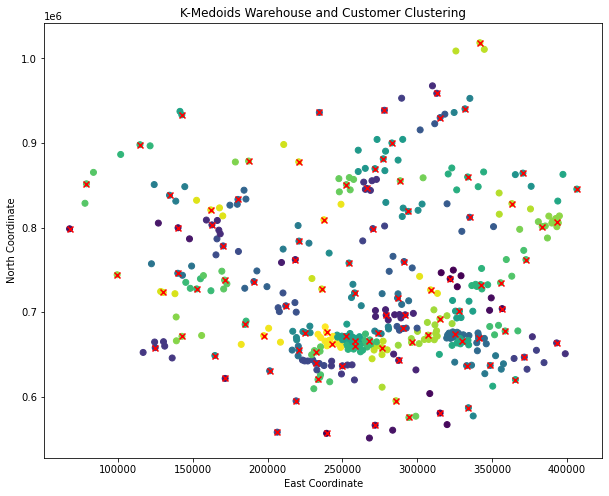

In [17]:
# Plot K-Medoids data
plt. figure(figsize=(10, 8))
plt.scatter(frame['X'], frame['Y'], c = kmed.labels_, cmap = 'viridis')
plt.scatter(kmed.cluster_centers_[:,0],kmed.cluster_centers_[:,1], marker = 'x', color='red')
plt.title('K-Medoids Warehouse and Customer Clustering')
plt.xlabel('East Coordinate')
plt.ylabel('North Coordinate')

plt.show()

In [18]:
# list of which warehouses are actually chosen
centroid_indices = kmed.medoid_indices_
cent_idx = centroid_indices.tolist()

# get coords of the chosen warehouses
es = []
ns = []
for i in cent_idx:
    e = warehouses['Cand East Coord'].iloc[i]
    es.append(e)
    n = warehouses['Cand North Coord'].iloc[i]
    ns.append(n)

# DataFrame of all aggregated data
chosen_warehouses = pd.DataFrame.from_dict(final_demand, orient='index', columns=['Demand Served'])
chosen_warehouses['Warehouse ID'] = cent_idx
chosen_warehouses['X coord'] = es
chosen_warehouses['Y coord'] = ns
chosen_warehouses = chosen_warehouses.iloc[:,[1,0,2,3]]
chosen_warehouses.head()

,Warehouse ID,Demand Served,X coord,Y coord
0,394,159939,322108,739419
1,51,183242,239503,556588
2,54,504760,315370,580567
3,296,275741,356867,704104
4,191,963855,67682,798485


In [19]:
len(cent_idx)

100

In [20]:
chosen_warehouses.shape

(100, 4)

In [21]:
sorted_ware = chosen_warehouses.sort_values(by=['Warehouse ID'])
sorted_x = sorted_ware['X coord'].tolist()
sorted_y = sorted_ware['Y coord'].tolist()

In [22]:
sorted_ware.head()

,Warehouse ID,Demand Served,X coord,Y coord
79,4,566112,383616,801140
82,11,2035868,393198,806862
28,18,54289,335113,812134
59,23,685055,406781,845456
51,25,247484,370725,864362


In [23]:
ware_df.head()

,X,Y,Demand,Cluster
0,392949,805109,30657,82
1,394404,805438,164159,82
2,393407,800946,297677,82
3,385705,801808,33948,79
4,383616,801140,45164,79


In [24]:
ware_df.shape

(440, 4)

In [25]:
# which customers are assigned to which warehouses
sorted_clusters = ware_df.sort_values(['Cluster'])
sorted_clusters.head()

,X,Y,Demand,Cluster
392,324207,749611,47713,0
393,329372,742931,28895,0
395,326860,729930,16557,0
394,322108,739419,9532,0
391,316105,746535,57242,0


In [26]:
# chosen_warehouses (100,4)
sorted_clusters
f = []
for k in sorted_clusters.index: 
    for i in chosen_warehouses.index:
        if ware_df['Cluster'].iloc[k] == i:
            val = chosen_warehouses['Warehouse ID'].iloc[i]
            f.append(val)
        
len(f)

440

In [27]:
sorted_clusters['Warehouse ID'] = f

In [28]:
sorted_clusters.shape

(440, 5)

In [29]:
# sorted_clusters['Cluster'].tolist()
# sorted_clusters['Warehouse ID'].tolist()

In [30]:
a = []
for i in sorted_clusters['Warehouse ID'].unique():
    val = sorted_clusters['Demand'].loc[sorted_clusters['Warehouse ID'] == i].sum()
    a.append(val)
# a

In [31]:
import random
random.seed = 2025
rand_list = []
# pick a random point as the customer for each warehouse cluster
for i in sorted_clusters['Warehouse ID'].unique():
    # get subset of all customers that have that warehouse ID
    subset = sorted_clusters['Demand'].loc[sorted_clusters['Warehouse ID'] == i].index
    # random choose an index from the list to choose as customer coordinates
    rand_idx = random.choice(subset)
    rand_list.append(rand_idx)
#     rand_idx.tolist()
print(rand_list)



[394, 51, 53, 302, 191, 48, 420, 342, 423, 127, 314, 124, 229, 283, 437, 199, 355, 258, 280, 435, 401, 52, 250, 417, 266, 339, 107, 274, 18, 397, 218, 351, 225, 267, 78, 59, 385, 268, 375, 101, 426, 409, 234, 166, 273, 132, 56, 329, 408, 406, 160, 25, 202, 210, 278, 322, 301, 136, 183, 23, 79, 432, 220, 154, 38, 186, 344, 371, 307, 98, 42, 259, 43, 189, 366, 264, 196, 45, 203, 14, 213, 362, 1, 379, 104, 298, 106, 46, 27, 285, 311, 71, 217, 378, 226, 383, 240, 334, 324, 180]


In [32]:
len(rand_list)

100

In [35]:
cust_x = []
cust_y = []
for i in rand_list:
    x = sorted_clusters['X'].iloc[i]
    cust_x.append(x)
    y =  sorted_clusters['Y'].iloc[i]
    cust_y.append(y)



In [65]:
op = []
for i in sorted_clusters['Warehouse ID'].unique():
    cost = operating[i]
    op.append(cost)
    
sets = []
for j in sorted_clusters['Warehouse ID'].unique():
    cost2 = setup[j]
    sets.append(cost2)
    
    

In [66]:
import math
ag = pd.DataFrame(data=sorted_clusters['Warehouse ID'].unique(), columns=['Warehouse ID'])
ag['tot demand'] = a
ag['WH X'] = chosen_warehouses['X coord']
ag['WH Y'] = chosen_warehouses['Y coord']
ag['Cust X'] = cust_x
ag['Cust Y'] = cust_y
ag['operating cost'] = op
ag['setup cost'] = sets

d = []
for i in ag.index:
    dist = math.sqrt((ag['WH X'].iloc[i] - ag['Cust X'].iloc[i])**2 + (ag['WH Y'].iloc[i]-ag['Cust Y'].iloc[i])**2)
    dist = round(dist)
    d.append(dist)

ag['Dist'] = d 
ag.head()

,Warehouse ID,tot demand,WH X,WH Y,Cust X,Cust Y,operating cost,setup cost,Dist
0,394,159939,322108,739419,363355,828365,282000,2820000,98044
1,51,183242,239503,556588,272839,856895,62500,625000,302152
2,54,504760,315370,580567,124544,664566,94400,944000,208496
3,296,275741,356867,704104,266607,658639,144800,1448000,101064
4,191,963855,67682,798485,223653,676903,62500,625000,197760


In [69]:
len(ag['Dist'].tolist())

100

In [ ]:
# chosen_warehouses.to_csv('aggy_warehouses.csv')